In [34]:
import pandas as pd
 
df=pd.read_csv(r"C:\Users\21311\Downloads\Clean_Dataset.csv.zip")




In [35]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [36]:
df.airline.value_counts()


airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [37]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [38]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [39]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [40]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [41]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [42]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [43]:
df['duration'].min()

0.83

In [44]:
df['duration'].max()

49.83

In [45]:
df = df.drop('flight', axis=1)

In [46]:
df = df.drop('Unnamed: 0', axis=1)

In [47]:
df['class'] = df['class'].apply(lambda x: 1 if x=='Business' else 0)

In [48]:
df.stops=pd.factorize(df.stops)[0]

In [49]:
df = df.join(pd.get_dummies(df.airline, prefix='airline',dtype= int)).drop('airline', axis=1)



In [50]:
df = df.join(pd.get_dummies(df.source_city, prefix='source',dtype=int)).drop('source_city', axis=1)

In [51]:
df = df.join(pd.get_dummies(df.destination_city, prefix='destination',dtype=int)).drop('destination_city', axis=1)

In [52]:
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival',dtype=int)).drop('arrival_time', axis=1)

In [53]:
df = df.join(pd.get_dummies(df.departure_time, prefix='departure',dtype= int)).drop('departure_time', axis=1)

In [54]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


training the model


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X,y = df.drop('price', axis=1),df.price


In [56]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [57]:
reg=RandomForestRegressor()

reg.fit(X_train,y_train)

RandomForestRegressor()

In [58]:
reg.score(X_test,y_test)

0.9855803563805247

In [59]:
import math
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

y_pred=reg.predict(X_test)

print('R2', r2_score(y_test,y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test,y_pred)))


R2 0.9855803563805247
MAE: 1067.7414285201744
MSE: 7463005.1184600275
RMSE: 2731.8501273788843


Text(0.5, 1.0, 'prediction vs actual')

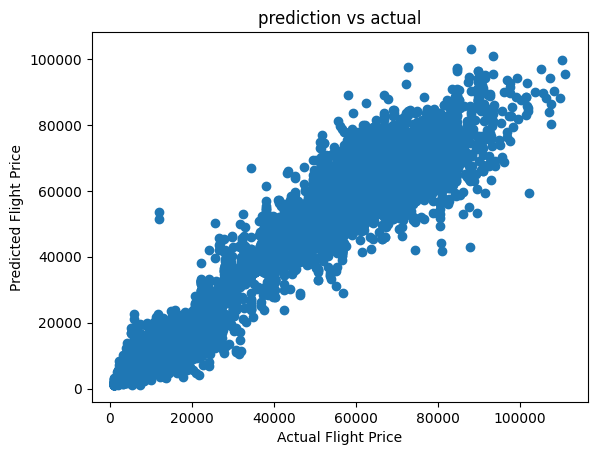

In [60]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('prediction vs actual')

In [61]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [68]:
important_features_dict = {}

for idx,val in enumerate(reg.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,key= important_features_dict.get,reverse=True)

print(f'5 most important features:{important_features_list[:5]}')

5 most important features:[1, 2, 3, 9, 5]


In [76]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances= sorted(importances.items(), key=lambda x:x[1],  reverse = True)

In [77]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 5 artists>

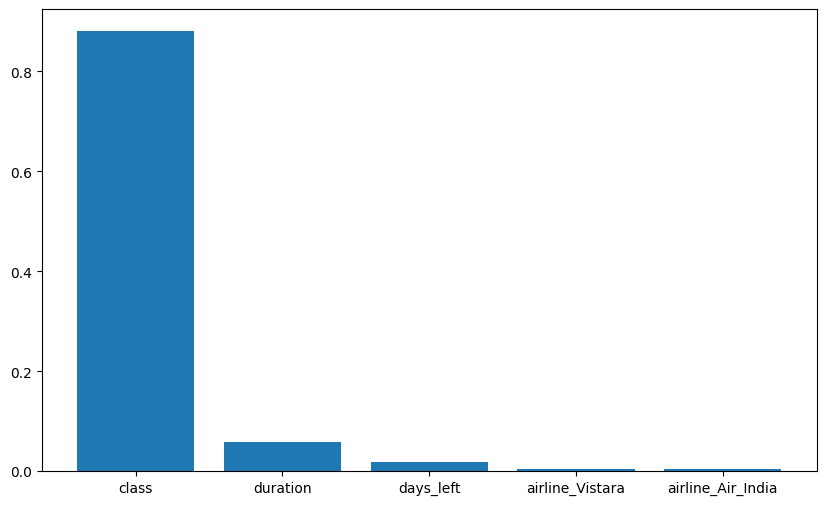

In [81]:
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in sorted_importances[:5]], [x[1] for x in sorted_importances[:5]])

In [112]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist= {
    'n_estimators': randint(100, 300),
    'max_depth':[None,10,20,30,40,50],
    'min_samples_split':randint(2,11),
    'min_samples_leaf': randint(1,5),
    'max_features':[1.0, 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor= random_search.best_estimator_




Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [109]:
best_regressor.score(X_test,y_test)

0.9863665849896566